## Pattern Recognition Assignment 6


## Optical Recognition of Handwritten Digits Using CNN

### Import Important Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

### Load and Split Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
(X_train.shape , X_test.shape)

((60000, 28, 28), (10000, 28, 28))

### Create and Build Model

In [4]:
epochs = 50
batch_size = 32
loss = tf.keras.losses.sparse_categorical_crossentropy
metrics = ['accuracy']
optimizer = tf.keras.optimizers.Adam(0.0005)

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=optimizer , loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,002,698
Trainable params: 2,002,698
Non-

In [6]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 11s 5ms/step - loss: 1.0077 - accuracy: 0.8444 - val_loss: 0.3591 - val_accuracy: 0.9103
Epoch 2/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.9193 - val_loss: 0.2644 - val_accuracy: 0.9306
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2275 - accuracy: 0.9369 - val_loss: 0.2511 - val_accuracy: 0.9394
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2004 - accuracy: 0.9457 - val_loss: 0.2080 - val_accuracy: 0.9390
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1694 - accuracy: 0.9519 - val_loss: 0.1921 - val_accuracy: 0.9493
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1542 - accuracy: 0.9550 - val_loss: 0.1820 - val_accuracy: 0.9535
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1348 - accuracy: 0.9607 - val_loss: 0.1796 - val_accuracy

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5801 - accuracy: 0.9576


[0.580105721950531, 0.9575999975204468]

### Plot Training Curve

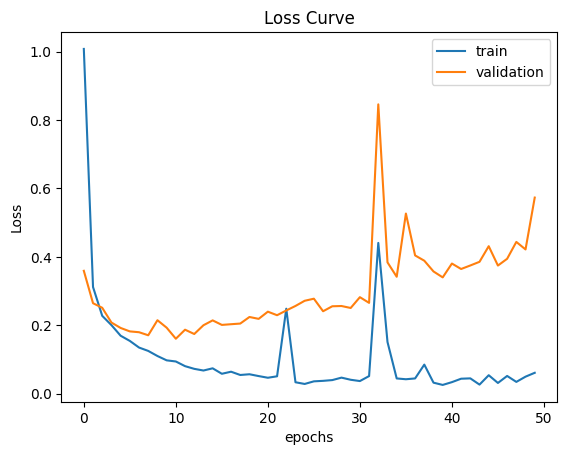

In [8]:
plt.plot(range(epochs), history.history['loss'], label='train')
plt.plot(range(epochs), history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Optimal Number For Training epochs is 30

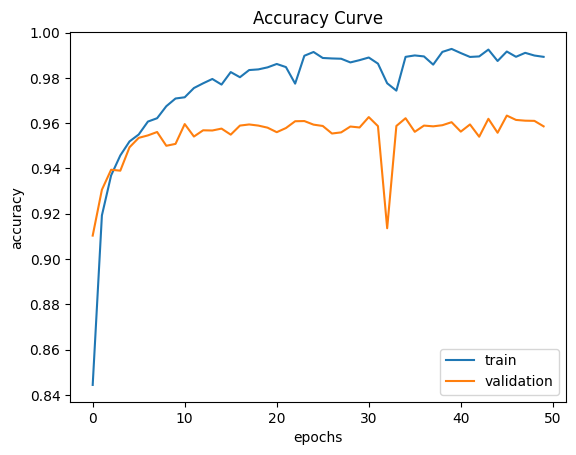

In [9]:
plt.plot(range(epochs), history.history['accuracy'], label='train')
plt.plot(range(epochs), history.history['val_accuracy'], label='validation')
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

### LeNet Model

In [16]:
LeNet = Sequential()
LeNet.add(Conv2D(6, kernel_size=(5, 5), input_shape=(28, 28, 1)))
LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=2))
LeNet.add(Conv2D(16, kernel_size=(5, 5)))
LeNet.add(MaxPooling2D(pool_size=(2, 2), strides=2))
LeNet.add(Flatten())
LeNet.add(Dense(120, activation='relu'))
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(10, activation='softmax'))
LeNet.compile(optimizer=tf.keras.optimizers.Adam(0.001) , loss=loss, metrics=metrics)
LeNet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 120)              

In [17]:
LeNet_history = LeNet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.6332 - accuracy: 0.8856 - val_loss: 0.2071 - val_accuracy: 0.9432
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1538 - accuracy: 0.9571 - val_loss: 0.1724 - val_accuracy: 0.9570
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1138 - accuracy: 0.9672 - val_loss: 0.1372 - val_accuracy: 0.9613
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0973 - accuracy: 0.9723 - val_loss: 0.0909 - val_accuracy: 0.9761
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0855 - accuracy: 0.9761 - val_loss: 0.1052 - val_accuracy: 0.9738
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0716 - accuracy: 0.9802 - val_loss: 0.0874 - val_accuracy: 0.9762
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0683 - accuracy: 0.9804 - val_loss: 0.0888 - val_accuracy:

In [18]:
LeNet.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1708 - accuracy: 0.9825


[0.17081968486309052, 0.9825000166893005]

### Plot LeNet Training Curve

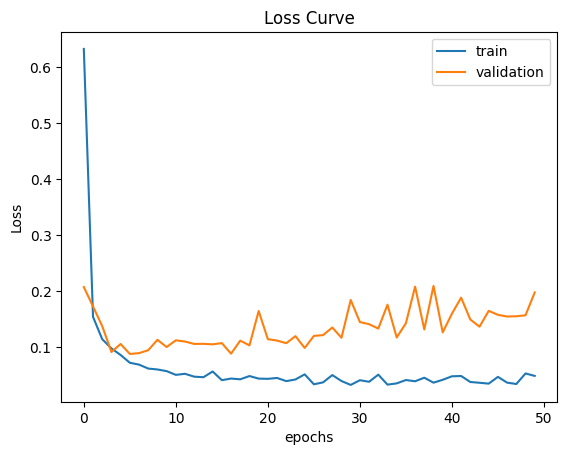

In [19]:
plt.plot(range(epochs), LeNet_history.history['loss'], label='train')
plt.plot(range(epochs), LeNet_history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Optimal Number For Training epochs is 15

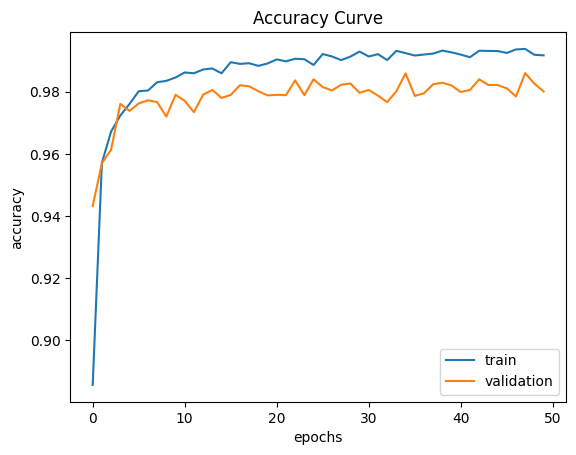

In [20]:
plt.plot(range(epochs), LeNet_history.history['accuracy'], label='train')
plt.plot(range(epochs), LeNet_history.history['val_accuracy'], label='validation')
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()